Analysis of the LCCS validation data, 2020.

In [36]:
import geopandas, pandas, numpy as np, glob, scipy.spatial.distance, matplotlib.pyplot as plt, cartopy
import scipy.stats

## Validation comparison

Analysis of the subset which enables comparison between multiple individuals.

In [2]:
pattern = '/g/data/r78/LCCS_Aberystwyth/validation/validation_comparison_completed/validation_comparison_*.shp'
filenames = sorted(glob.glob(pattern))
names = [filename.split('_')[-1][:-4] for filename in filenames]
subtables = [geopandas.read_file(filename)[['classified', 'output']] for filename in filenames]
data = pandas.concat([subtables[0].classified] + 
                     [df.output.rename(name) for name, df in zip(names, subtables)], axis=1)
data

,classified,ChrisO,Eloise,Gabrielle,Norman,Richard,belle,ben,Cate,erin,erinv2,sean
0,111,111,111,111,111,111,111,111,111,111,111,111
1,111,112,112,112,112,112,112,112,112,112,112,112
2,111,111,111,m,111,111,111,111,111,111,111,111
3,111,111,111,111,111,111,111,111,111,111,111,111
4,111,112,112,112,112,112,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...
139,220,220,220,220,220,220,220,220,220,220,220,220
140,220,220,220,220,220,220,220,220,220,220,220,220
141,220,124,220,220,220,220,220,220,220,220,112,220
142,220,220,220,220,220,220,220,220,220,220,220,220


In [3]:
clean = data.replace(['m', 'u'], [0, 1]).values.T
dist = scipy.spatial.distance.pdist(clean, 'jaccard')
dist = scipy.spatial.distance.squareform(dist)
dist = pandas.DataFrame((1-dist) * 100, columns=data.columns, index=data.columns)

dist.round(3).style.background_gradient(cmap='cividis_r', axis=None).set_precision(2)

,classified,ChrisO,Eloise,Gabrielle,Norman,Richard,belle,ben,Cate,erin,erinv2,sean
classified,100.00,75.00,83.33,84.72,84.72,84.72,82.64,79.17,87.50,93.75,81.25,83.33
ChrisO,75.00,100.00,83.92,82.64,85.42,77.78,84.72,80.42,84.03,79.17,87.50,81.25
Eloise,83.33,83.92,100.00,89.58,90.97,86.11,90.28,84.72,90.97,85.42,89.58,84.03
Gabrielle,84.72,82.64,89.58,100.00,92.36,85.42,88.89,88.89,93.71,88.19,89.58,89.58
Norman,84.72,85.42,90.97,92.36,100.00,86.81,90.28,90.28,91.67,86.81,91.67,89.58
Richard,84.72,77.78,86.11,85.42,86.81,100.00,84.03,86.11,86.11,86.11,84.03,85.42
belle,82.64,84.72,90.28,88.89,90.28,84.03,100.00,83.33,91.67,85.42,90.97,86.11
ben,79.17,80.42,84.72,88.89,90.28,86.11,83.33,100.00,87.50,81.94,85.42,89.58
Cate,87.50,84.03,90.97,93.71,91.67,86.11,91.67,87.50,100.00,89.58,91.67,89.58
erin,93.75,79.17,85.42,88.19,86.81,86.11,85.42,81.94,89.58,100.00,87.41,88.19


## Change detection

For the full validation dataset, need to match points between 2010 and 2015 datasets.

In [4]:
def gather(year):
    pattern = '/g/data/r78/LCCS_Aberystwyth/validation/' + year + '/complete_clusters/validation_*.shp'
    return pandas.concat([geopandas.read_file(filename) for filename in glob.glob(pattern)])
before = gather('2010')
after = gather('2015')

In [5]:
before

,classified,output,processed,cluster,geometry
0,111,112,1,40,POINT (1474537.500 -1899512.500)
1,111,111,1,40,POINT (1482862.500 -2082512.500)
2,111,u,1,40,POINT (1429362.500 -1944612.500)
3,111,111,1,40,POINT (1454387.500 -1997087.500)
4,112,112,1,40,POINT (1382687.500 -2172612.500)
...,...,...,...,...,...
77,124,124,1,17,POINT (1070412.500 -1351687.500)
78,220,220,1,17,POINT (1092112.500 -1395637.500)
79,220,220,1,17,POINT (1096887.500 -1332962.500)
80,220,220,1,17,POINT (1100837.500 -1315387.500)


In [6]:
after

,classified,output,processed,cluster,geometry
0,111,112,1,19,POINT (-41087.500 -1299437.500)
1,111,112,1,19,POINT (-122737.500 -1508987.500)
2,111,112,1,19,POINT (-43387.500 -1306512.500)
3,111,112,1,19,POINT (-74412.500 -1530862.500)
4,112,112,1,19,POINT (25712.500 -1490187.500)
...,...,...,...,...,...
80,220,220,1,17,POINT (-1510162.500 -3691712.500)
81,220,220,1,17,POINT (-1398362.500 -3851587.500)
82,220,m,1,17,POINT (-1258337.500 -3886087.500)
83,220,220,1,17,POINT (-1276137.500 -3890462.500)


In [7]:
pandas.merge(before, after, on='geometry')

,classified_x,output_x,processed_x,cluster_x,geometry,classified_y,output_y,processed_y,cluster_y
0,111,112,1,40,POINT (1474537.500 -1899512.500),111,112,1,13
1,111,111,1,40,POINT (1482862.500 -2082512.500),111,111,1,13
2,111,u,1,40,POINT (1429362.500 -1944612.500),111,111,1,13
3,111,111,1,40,POINT (1454387.500 -1997087.500),111,112,1,13
4,112,112,1,40,POINT (1382687.500 -2172612.500),112,112,1,13
...,...,...,...,...,...,...,...,...,...
5811,124,124,1,17,POINT (1070412.500 -1351687.500),124,124,1,32
5812,220,220,1,17,POINT (1092112.500 -1395637.500),220,220,1,32
5813,220,220,1,17,POINT (1096887.500 -1332962.500),220,220,1,32
5814,220,220,1,17,POINT (1100837.500 -1315387.500),220,220,1,32


### Mismatches

There are several reasons for mismatches:
 - The epochs have unequal location counts from the outset.
 - Some clusters (2010's 6 & 19) have coordinate jitter, probably due to spurious reprojection.


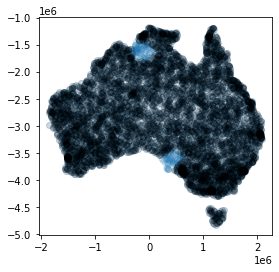

In [8]:
before.plot(alpha=0.1)
pandas.merge(before, after, on='geometry').plot(alpha=0.1, color='k', ax=plt.gca())

In [9]:
merged = pandas.merge(before, after, on='geometry', how='outer')
merged

,classified_x,output_x,processed_x,cluster_x,geometry,classified_y,output_y,processed_y,cluster_y
0,111,112,1,40.0,POINT (1474537.500 -1899512.500),111,112,1,13.0
1,111,111,1,40.0,POINT (1482862.500 -2082512.500),111,111,1,13.0
2,111,u,1,40.0,POINT (1429362.500 -1944612.500),111,111,1,13.0
3,111,111,1,40.0,POINT (1454387.500 -1997087.500),111,112,1,13.0
4,112,112,1,40.0,POINT (1382687.500 -2172612.500),112,112,1,13.0
...,...,...,...,...,...,...,...,...,...
6176,NaN,NaN,NaN,NaN,POINT (340312.500 -3621487.500),216,216,1,28.0
6177,NaN,NaN,NaN,NaN,POINT (406837.500 -3471487.500),216,112,1,28.0
6178,NaN,NaN,NaN,NaN,POINT (495687.500 -3528787.500),216,112,1,28.0
6179,NaN,NaN,NaN,NaN,POINT (495287.500 -3526162.500),216,112,1,28.0


In [10]:
merged[merged.isnull().any(axis=1)].groupby('cluster_x').size()

cluster_x
1.0      1
6.0     82
19.0    99
41.0     1
47.0     1
dtype: int64

In [11]:
merged[merged.isnull().any(axis=1)].groupby('cluster_y').size()

cluster_y
8.0      9
10.0     8
19.0    21
28.0    43
36.0    69
39.0    31
dtype: int64

In [12]:
x = before.geometry.x
y = before.geometry.y
before.loc[(x.round(1) != x) | (y.round(1) != y)].groupby('cluster').size()

cluster
6     82
19    99
dtype: int64

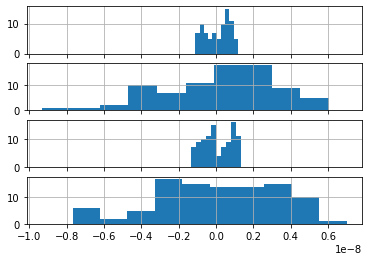

In [13]:
fig, axes = plt.subplots(4, 1, sharex=True)
(before.query('cluster == 6').geometry.x - before.query('cluster == 6').geometry.x.round(1)).hist(ax=axes[0])
(before.query('cluster == 6').geometry.y - before.query('cluster == 6').geometry.y.round(1)).hist(ax=axes[1])
(before.query('cluster == 19').geometry.x - before.query('cluster == 19').geometry.x.round(1)).hist(ax=axes[2])
(before.query('cluster == 19').geometry.y - before.query('cluster == 19').geometry.y.round(1)).hist(ax=axes[3])

In [14]:
before.geometry = geopandas.points_from_xy(before.geometry.x.round(1), before.geometry.y.round(1))

In [15]:
data = pandas.merge(before, after, on='geometry', suffixes=['2010', '2015'])
data

,classified2010,output2010,processed2010,cluster2010,geometry,classified2015,output2015,processed2015,cluster2015
0,111,112,1,40,POINT (1474537.500 -1899512.500),111,112,1,13
1,111,111,1,40,POINT (1482862.500 -2082512.500),111,111,1,13
2,111,u,1,40,POINT (1429362.500 -1944612.500),111,111,1,13
3,111,111,1,40,POINT (1454387.500 -1997087.500),111,112,1,13
4,112,112,1,40,POINT (1382687.500 -2172612.500),112,112,1,13
...,...,...,...,...,...,...,...,...,...
5992,124,124,1,17,POINT (1070412.500 -1351687.500),124,124,1,32
5993,220,220,1,17,POINT (1092112.500 -1395637.500),220,220,1,32
5994,220,220,1,17,POINT (1096887.500 -1332962.500),220,220,1,32
5995,220,220,1,17,POINT (1100837.500 -1315387.500),220,220,1,32


In [16]:
merged = pandas.merge(before, after, on='geometry', how='outer')
merged[merged.isnull().any(axis=1)]

,classified_x,output_x,processed_x,cluster_x,geometry,classified_y,output_y,processed_y,cluster_y
582,112,112,1,1,POINT (1596537.500 -3471112.500),NaN,NaN,NaN,NaN
2159,112,112,1,47,POINT (366362.500 -1726562.500),NaN,NaN,NaN,NaN
4796,112,216,1,41,POINT (-579762.500 -3497112.500),NaN,NaN,NaN,NaN


In [17]:
len(before), len(after)

(6000, 5997)

At this point, *every* point from the 2015 dataset has been matched to a point in the 2010 dataset. (Only 3 points are left over.)

### Change statistics

Firstly, slightly more data cleaning..

In [18]:
# exclude data with ambiguous categorisation
clean = data.query("(output2010 not in ['m', 'u']) & (output2015 not in ['m', 'u'])")
len(clean)

5763

In [19]:
# exclude data with invalid categorisation
clean = clean[['0' not in row and '1' not in row 
        for row in clean[['classified2010', 'classified2015', 'output2010', 'output2015']].values]]
len(clean)

5758

In [20]:
100 - 100 * len(clean) / max(len(before), len(after)) # percentage lost

4.033333333333331

In [21]:
# subset where classifier agreed with validation
perfect = clean.query('(output2010 == classified2010) & (output2015 == classified2015)')
flawed = clean.query('(output2010 != classified2010) | (output2015 != classified2015)')
len(perfect), len(flawed)

(3844, 1914)

In [22]:
100 * len(perfect) / len(clean) # percentage correct

66.75929142063217

In [23]:
changes = clean.rename(columns=dict(classified2010='2010', classified2015='2015')).groupby(['2010', '2015'])
changes2 = clean.rename(columns=dict(output2010='2010', output2015='2015')).groupby(['2010', '2015'])
changes3 = perfect.rename(columns=dict(output2010='2010', output2015='2015')).groupby(['2010', '2015'])

comparison = pandas.concat([changes.size().rename('classifier_count'),
                            changes2.size().rename('validator_count'),
                            changes3.size().rename('correct')], axis=1).fillna(0).astype(int)
comparison

classifier_count  validator_count  correct
2010 2015                                            
111  111                352              334      216
     112                166               42       11
     215                  2                0        0
     216                 88                1        1
     220                  8                0        0
112  111                263              152       87
     112               2433             2926     2176
     124                  3               15        2
     215                 46               35       25
     216                508              490      202
     220                 32                6        3
124  112                  0                5        0
     124                284              286      277
     215                  0                1        0
     216                  0                1        0
     220                  2                5        1
215  215                152              210      143
     216                  0                2        0
216  111                 54                3        2
     112                190              427       86
     124                  0                2        0
     215                 57                9        5
     216                838              509      356
     220                 40               59       35
220  111                  1                2        1
     112                  9                6        4
     124                 10               11        5
     216                 15               19       13
     220                205              200      193

In [24]:
total_clean = len(clean)

assert comparison.classifier_count.sum() == total_clean
assert comparison.validator_count.sum() == total_clean
assert (comparison.correct <= comparison.classifier_count).all()
assert (comparison.correct <= comparison.validator_count).all()

# True positives, false negatives, etc
TP = comparison.correct
FP = comparison.classifier_count - TP
FN = comparison.validator_count - TP
TN = total_clean - (TP + FP + FN)

assert (FP >= 0).all()
assert (FN >= 0).all()
assert (TN >= 0).all()

# Likelihood that a particular change is detected:
sensitivity = (TP / (TP + FN)).rename('sensitivity') * 100

# Likelihood of no spurious detection in absence of the change:
specificity = (TN / (TN + FP)).rename('specificity') * 100

# Likelihood that a discovery is spurious:
FDR = (FP / (TP + FP)).rename('false discovery rate') * 100

pandas.concat([comparison, sensitivity.round(2), specificity.round(2), FDR.round(2)], axis=1
             ).style.background_gradient(cmap='viridis', axis=1).set_precision(1)

### Spatial variation

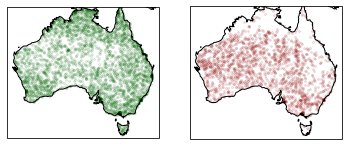

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection=cartopy.crs.epsg(3577)))
ax1.add_feature(cartopy.feature.COASTLINE)
ax2.add_feature(cartopy.feature.COASTLINE)
perfect.plot(ax=ax1, color='darkgreen', alpha=0.1, markersize=4) # good points (green)
flawed.plot(ax=ax2, color='darkred', alpha=0.1, markersize=4) # bad points (red)
None

In [ ]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
Plot the results:

>>>
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [27]:
extent = [clean.geometry.x.min(), clean.geometry.x.max(), clean.geometry.y.min(), clean.geometry.y.max()]
extent

[-1846937.5, 2080187.5, -4833162.5, -1179087.5]

In [46]:
x, y = np.mgrid[extent[0]:extent[1]:100j, extent[2]:extent[3]:100j]
coords = np.vstack([x.ravel(), y.ravel()])

In [60]:
samples = np.vstack([clean.geometry.x, clean.geometry.y])
density = scipy.stats.gaussian_kde(samples)(coords).reshape(x.shape)

In [61]:
goodsamples = np.vstack([perfect.geometry.x, perfect.geometry.y])
density2 = scipy.stats.gaussian_kde(goodsamples)(coords).reshape(x.shape)

In [76]:
badsamples = np.vstack([flawed.geometry.x, flawed.geometry.y])
density3 = scipy.stats.gaussian_kde(badsamples)(coords).reshape(x.shape)

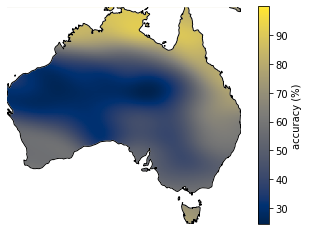

In [95]:
ax = plt.gcf().add_subplot(1, 1, 1, projection=cartopy.crs.epsg(3577), frameon=False)
ax.add_feature(cartopy.feature.COASTLINE, zorder=110)
#perfect.plot(ax=ax, color='darkgreen', alpha=0.1, markersize=4) # good points (green)
#flawed.plot(ax=ax, color='darkred', alpha=0.1, markersize=4) # bad points (red)
im = ax.imshow(100 * (density2 / (density2 + density3)).T, extent=extent, origin='lower', cmap='cividis')
plt.colorbar(im).set_label('accuracy (%)')
ax.add_feature(cartopy.feature.OCEAN, zorder=100, facecolor='w')
None

Trouble is, can the density estimate be trusted? An alternative is a simple 2D histogram.

Aside, what accuracy is this? It is the likelihood that both dates are correct. (In other words, it should approximate the *square* of the likelihood that any one date is correct.) It may not be appropriate to call this a "change" accuracy, because it does not exclude points which stayed constant between dates. (But such exclusion might not be straightforward, since both false positives and false negatives should be accounted for somehow..)